In [1]:
import os
from dataset import Cifar100
from model import AECifar
from utils import train_ae

import torch
import torch.nn as nn
import torchvision.transforms.functional as F
from torchvision import  transforms
import matplotlib.pyplot as plt
import numpy as np

import random

In [2]:
train_data = Cifar100("CIFAR100/TRAIN")
test_data = Cifar100("CIFAR100/TEST")

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=128, shuffle=True, num_workers=12
)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=128, num_workers=12
)

In [3]:
transform = transforms.RandomApply(
    torch.nn.ModuleList([
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=(0, 90))
    ]), p=0.3)

In [4]:
model = AECifar(10).cuda()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)

model

AECifar(
  (encoder): Encoder(
    (conv_block): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.01)
      )
      (1): Sequential(
        (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.01)
      )
      (2): Sequential(
        (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.01)
      )
      (3): Sequential(
        (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.01)
      )
      (4): Sequential(
        (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.01)
      )
      (5): Sequential(
        (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.01)
      )
      (6): Sequential(
    

In [5]:
def plot_result(train_losses, test_losses):
    x = list(range(len(train_losses)))
    plt.plot(x, train_losses, label="train losses")
    plt.plot(x, test_losses, label="test losses")
    plt.legend(["train losses", "test losses"])
    plt.show()

In [6]:
def show_result(model, test_loader):
    model.eval()
    photos_count = 5

    orig_images, _ = next(iter(test_loader))
    orig_images = orig_images / 255 
    f, imgs = plt.subplots(2, photos_count)
    f.tight_layout(pad=1/photos_count)
    f.set_figheight(5)
    f.set_figwidth(16)

    images = model(orig_images.to(torch.float32).cuda())
    images = images.detach().cpu().numpy()
    images[images > 1] = 1
    images[images < 0] = 0
    
    for i in range(photos_count):
        j = random.randint(0, len(orig_images))
        showed_img = np.transpose(orig_images[j], (1, 2, 0)), np.transpose(images[j], (1, 2, 0))
        imgs[0, i].imshow(showed_img[0])
        imgs[1, i].imshow(showed_img[1])

    plt.show()

Train Epoch: 0 train loss: 0.0824 test loss: 0.0722
Train Epoch: 1 train loss: 0.0714 test loss: 0.0716
Train Epoch: 2 train loss: 0.0711 test loss: 0.0714
Train Epoch: 3 train loss: 0.0712 test loss: 0.0714
Train Epoch: 4 train loss: 0.0709 test loss: 0.0715
Train Epoch: 5 train loss: 0.0708 test loss: 0.0708
Train Epoch: 6 train loss: 0.0704 test loss: 0.0708
Train Epoch: 7 train loss: 0.0705 test loss: 0.0709
Train Epoch: 8 train loss: 0.0704 test loss: 0.0708
Train Epoch: 9 train loss: 0.0704 test loss: 0.0707
Train Epoch: 10 train loss: 0.0703 test loss: 0.0708
Train Epoch: 11 train loss: 0.0703 test loss: 0.0708
Train Epoch: 12 train loss: 0.0703 test loss: 0.0708
Train Epoch: 13 train loss: 0.0703 test loss: 0.0707
Train Epoch: 14 train loss: 0.0703 test loss: 0.0706
Train Epoch: 15 train loss: 0.0703 test loss: 0.0707
Train Epoch: 16 train loss: 0.0703 test loss: 0.0706
Train Epoch: 17 train loss: 0.0702 test loss: 0.0706
Train Epoch: 18 train loss: 0.0703 test loss: 0.0706
Tra

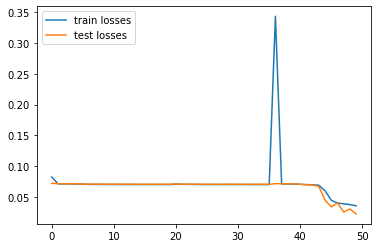

CPU times: user 5min 7s, sys: 1min 10s, total: 6min 17s
Wall time: 6min 39s


In [7]:
%%time
train_losses, test_losses = train_ae(50, model, train_loader, test_loader, loss_function, optimizer, noti_rate=1e3, transform=transform)
plot_result(train_losses, test_losses)

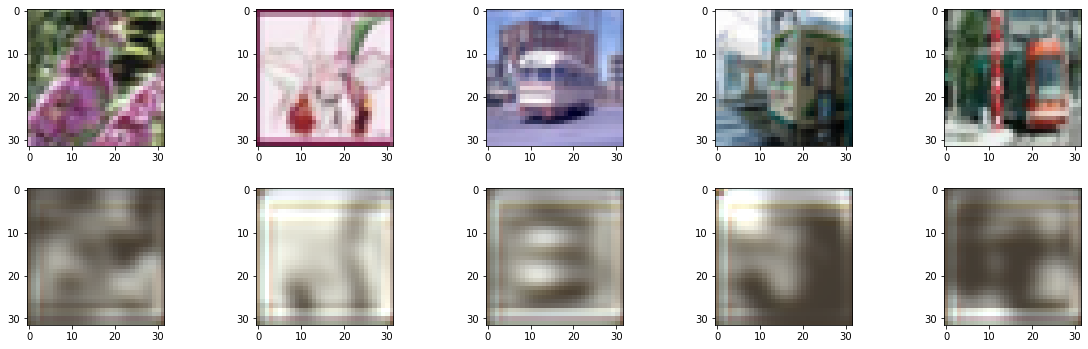

In [8]:
show_result(model, test_loader)

In [9]:
torch.save(model, "ae50.model")

Train Epoch: 0 train loss: 0.0347 test loss: 0.0241
Train Epoch: 1 train loss: 0.0352 test loss: 0.0218
Train Epoch: 2 train loss: 0.0342 test loss: 0.0228
Train Epoch: 3 train loss: 0.0335 test loss: 0.0201
Train Epoch: 4 train loss: 0.0363 test loss: 0.0235
Train Epoch: 5 train loss: 0.0335 test loss: 0.0261
Train Epoch: 6 train loss: 0.0325 test loss: 0.0248
Train Epoch: 7 train loss: 0.0309 test loss: 0.0182
Train Epoch: 8 train loss: 0.034 test loss: 0.0246
Train Epoch: 9 train loss: 0.0349 test loss: 0.0193
Train Epoch: 10 train loss: 0.0302 test loss: 0.0181
Train Epoch: 11 train loss: 0.0314 test loss: 0.017
Train Epoch: 12 train loss: 0.0302 test loss: 0.0169
Train Epoch: 13 train loss: 0.0295 test loss: 0.0162
Train Epoch: 14 train loss: 0.032 test loss: 0.0169
Train Epoch: 15 train loss: 0.0329 test loss: 0.021
Train Epoch: 16 train loss: 0.0314 test loss: 0.0183
Train Epoch: 17 train loss: 0.0305 test loss: 0.0191
Train Epoch: 18 train loss: 0.031 test loss: 0.016
Train Epo

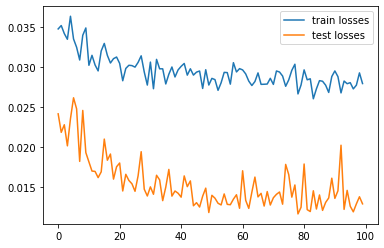

CPU times: user 10min 23s, sys: 2min 19s, total: 12min 42s
Wall time: 13min 23s


In [10]:
%%time
train_losses, test_losses = train_ae(
    100, model, train_loader, test_loader, loss_function, optimizer, noti_rate=1e3, transform=transform
)
plot_result(train_losses, test_losses)

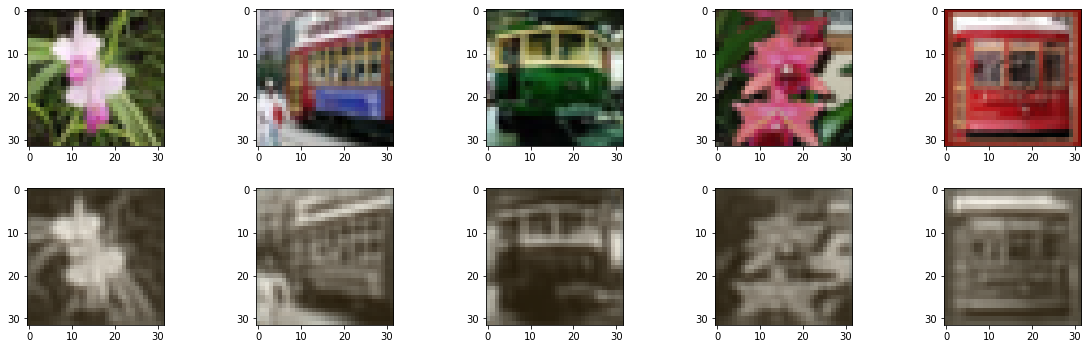

In [11]:
show_result(model, test_loader)

yeee it's work, i+'m very glad

In [12]:
torch.save(model, "ae150.model")

Train Epoch: 0 train loss: 0.0273 test loss: 0.0128
Train Epoch: 1 train loss: 0.0282 test loss: 0.0121
Train Epoch: 2 train loss: 0.0289 test loss: 0.0166
Train Epoch: 3 train loss: 0.0289 test loss: 0.0122
Train Epoch: 4 train loss: 0.0276 test loss: 0.0182
Train Epoch: 5 train loss: 0.0296 test loss: 0.0137
Train Epoch: 6 train loss: 0.0285 test loss: 0.0229
Train Epoch: 7 train loss: 0.0279 test loss: 0.0118
Train Epoch: 8 train loss: 0.0267 test loss: 0.014
Train Epoch: 9 train loss: 0.0275 test loss: 0.0161
Train Epoch: 10 train loss: 0.029 test loss: 0.0155
Train Epoch: 11 train loss: 0.0286 test loss: 0.0119
Train Epoch: 12 train loss: 0.0273 test loss: 0.013
Train Epoch: 13 train loss: 0.0291 test loss: 0.0145
Train Epoch: 14 train loss: 0.0267 test loss: 0.0112
Train Epoch: 15 train loss: 0.0287 test loss: 0.0118
Train Epoch: 16 train loss: 0.0265 test loss: 0.0142
Train Epoch: 17 train loss: 0.0281 test loss: 0.0124
Train Epoch: 18 train loss: 0.0272 test loss: 0.0113
Train 

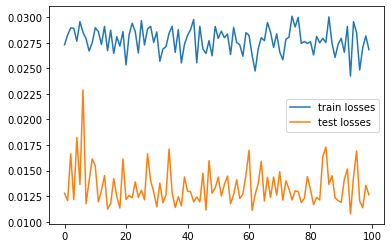

CPU times: user 11min, sys: 2min 22s, total: 13min 23s
Wall time: 14min 6s


In [13]:
%%time
train_losses, test_losses = train_ae(100, model, train_loader, test_loader, loss_function, optimizer, noti_rate=1e3, transform=transform)
plot_result(train_losses, test_losses)

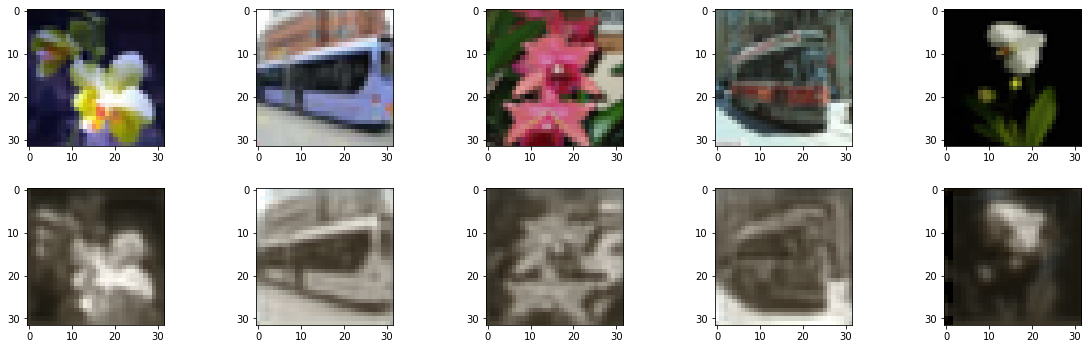

In [14]:
show_result(model, test_loader)

In [15]:
torch.save(model, "ae250.model")